# Action Analytics 
 
1. Assignment prepared for Collection module.
2. We have prepare data by own , after digging into the business demands and how our analytics will help to take the right decision for future prospects.
3. The dataset which we prepared has 2000 records and 9 columns 
4. We can introduce more variables , if business demands for solution.
5. We have implemented full Analytical cycle in this assignment.
6. As this assignment is a classification problem , hence we have choosen Logistic Regression and Random Forest Machine Learning Algorithms.

##### Problem Statement - 

A. Find out on which DPD of Customer Segment what action strategy need to consider.

##### IDE - Jupyter Notebook
##### Python 3.0


###### Author - Chandrasen Wadikar
###### Date - Nov. 2019

#  Logisitic Regression Model 

## Step 1 : Importing Data 

In [1]:
# suppressing warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Importing the pandas and numpy

import pandas as pd
import numpy as np

##  Step 2 : Inspecting the DataFrame

In [3]:
# Imporitng data set

action_analytics = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/action_analytics.csv")
action_analytics.head()

,CUSTOMER_NUMBER,ACCOUNT_NUMBER,CUSTOMER_SEGMENT,ACTION_DATE,ACTION_STRATEGY,DPD_OF_ACTION,COLLECTOR_CODE,SUCCESSFUL_ACTION
0,CN48562492,2423104486,S1,04-03-2000,ACT1,1-10,C1,1
1,CN72623151,4605993654,S1,17-04-2000,ACT2,1-10,C2,1
2,CN27144358,8301851874,S1,28-06-2000,ACT3,1-10,C3,1
3,CN33795572,9453054029,S1,15-05-2000,ACT4,1-10,C4,0
4,CN28279711,2248165088,S1,09-02-2000,ACT5,1-10,C5,0


In [4]:
# Check the dimesions of the dataframe
action_analytics.shape

(2000, 8)

In [5]:
# Look at the Statistical aspects of the DataFrame
action_analytics.describe()

,ACCOUNT_NUMBER,SUCCESSFUL_ACTION
count,2.000000e+03,2000.000000
mean,6.125774e+09,0.500000
std,2.283648e+09,0.500125
min,2.239288e+09,0.000000
25%,4.054364e+09,0.000000
50%,6.151065e+09,0.500000
75%,8.173433e+09,1.000000
max,9.999667e+09,1.000000


In [6]:
# Check the info of each column
action_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
CUSTOMER_NUMBER      2000 non-null object
ACCOUNT_NUMBER       2000 non-null int64
CUSTOMER_SEGMENT     2000 non-null object
ACTION_DATE          2000 non-null object
ACTION_STRATEGY      2000 non-null object
DPD_OF_ACTION        2000 non-null object
COLLECTOR_CODE       2000 non-null object
SUCCESSFUL_ACTION    2000 non-null int64
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


In [7]:
for col in ['CUSTOMER_NUMBER', 'DPD_OF_ACTION']:
    action_analytics[col] = action_analytics[col].astype('object')

In [8]:
# Converting date from object to numeric value
action_analytics['ACTION_DATE'] = pd.to_numeric(action_analytics.ACTION_DATE.str.replace('-',''))

In [9]:
action_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
CUSTOMER_NUMBER      2000 non-null object
ACCOUNT_NUMBER       2000 non-null int64
CUSTOMER_SEGMENT     2000 non-null object
ACTION_DATE          2000 non-null int64
ACTION_STRATEGY      2000 non-null object
DPD_OF_ACTION        2000 non-null object
COLLECTOR_CODE       2000 non-null object
SUCCESSFUL_ACTION    2000 non-null int64
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


In [10]:
# Checking null values in DataFrame

action_analytics.isnull().sum()

CUSTOMER_NUMBER      0
ACCOUNT_NUMBER       0
CUSTOMER_SEGMENT     0
ACTION_DATE          0
ACTION_STRATEGY      0
DPD_OF_ACTION        0
COLLECTOR_CODE       0
SUCCESSFUL_ACTION    0
dtype: int64

In [11]:
# Printing the data types of the data frame columns
print (action_analytics.dtypes)

CUSTOMER_NUMBER      object
ACCOUNT_NUMBER        int64
CUSTOMER_SEGMENT     object
ACTION_DATE           int64
ACTION_STRATEGY      object
DPD_OF_ACTION        object
COLLECTOR_CODE       object
SUCCESSFUL_ACTION     int64
dtype: object


In [12]:
action_analytics.head()

,CUSTOMER_NUMBER,ACCOUNT_NUMBER,CUSTOMER_SEGMENT,ACTION_DATE,ACTION_STRATEGY,DPD_OF_ACTION,COLLECTOR_CODE,SUCCESSFUL_ACTION
0,CN48562492,2423104486,S1,4032000,ACT1,1-10,C1,1
1,CN72623151,4605993654,S1,17042000,ACT2,1-10,C2,1
2,CN27144358,8301851874,S1,28062000,ACT3,1-10,C3,1
3,CN33795572,9453054029,S1,15052000,ACT4,1-10,C4,0
4,CN28279711,2248165088,S1,9022000,ACT5,1-10,C5,0


In [13]:
# Make the datatypes as DateTime

#action_analytics['ACTION_DATE'] = pd.to_datetime(action_analytics['ACTION_DATE'])

In [14]:
# Converting date into Integer for checking the impact on Feature Selection
#action_analytics['ACTION_DATE'] = action_analytics['ACTION_DATE'].str.replace('-','').apply(int)

In [15]:
#action_analytics.CUSTOMER_SEGMENT = pd.to_numeric(action_analytics.CUSTOMER_SEGMENT, errors = 'coerce')

## Step 3. Data Preparaton

In [16]:
# Checking the outliers
aa_act = action_analytics[['CUSTOMER_SEGMENT','ACTION_STRATEGY','DPD_OF_ACTION','COLLECTOR_CODE']]

In [17]:
# Checking outliers at 25%,50%,75%,90%,95%,99%
aa_act.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,CUSTOMER_SEGMENT,ACTION_STRATEGY,DPD_OF_ACTION,COLLECTOR_CODE
count,2000,2000,2000,2000
unique,5,25,5,16
top,S2,ACT17,31-40,C6
freq,401,85,415,282


In [18]:
# Assigning the numeric value for each DPD Action record.
varlist = ['DPD_OF_ACTION']

# defining tthe map function
def binary_map(x):
    return x.map({'1-10':1,"11-20":2,"21-30":3,"31-40":4,"41-50":5})

# Applying the function to the list

action_analytics[varlist] = action_analytics[varlist].apply(binary_map)




In [19]:
# Replace common value of COLLECTOR_CODE with space.
action_analytics.COLLECTOR_CODE = action_analytics.COLLECTOR_CODE.str.replace("[C]", " ")

In [20]:
action_analytics.ACTION_STRATEGY = action_analytics.ACTION_STRATEGY.str.replace('ACT', '')

In [21]:
# Defining numeric value to different Customer Segment as defined
varlist1 = ['CUSTOMER_SEGMENT']

# defining tthe map function
def binary_map(x):
    return x.map({'S1':1,"S2":2,"S3":3,"S4":4,"S5":5})

# Applying the function to the list

action_analytics[varlist1] = action_analytics[varlist1].apply(binary_map)



In [22]:
action_analytics.head()

,CUSTOMER_NUMBER,ACCOUNT_NUMBER,CUSTOMER_SEGMENT,ACTION_DATE,ACTION_STRATEGY,DPD_OF_ACTION,COLLECTOR_CODE,SUCCESSFUL_ACTION
0,CN48562492,2423104486,1,4032000,1,1,1,1
1,CN72623151,4605993654,1,17042000,2,1,2,1
2,CN27144358,8301851874,1,28062000,3,1,3,1
3,CN33795572,9453054029,1,15052000,4,1,4,0
4,CN28279711,2248165088,1,9022000,5,1,5,0


## Step 4 : Test-Train Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Putting feature variable

X= action_analytics.drop(['CUSTOMER_NUMBER','SUCCESSFUL_ACTION'],axis=1)
X.head()

,ACCOUNT_NUMBER,CUSTOMER_SEGMENT,ACTION_DATE,ACTION_STRATEGY,DPD_OF_ACTION,COLLECTOR_CODE
0,2423104486,1,4032000,1,1,1
1,4605993654,1,17042000,2,1,2
2,8301851874,1,28062000,3,1,3
3,9453054029,1,15052000,4,1,4
4,2248165088,1,9022000,5,1,5


In [25]:
# Putting response variable to y

y= action_analytics['SUCCESSFUL_ACTION']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: SUCCESSFUL_ACTION, dtype: int64

In [26]:
# Splitting the data into train and test

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.7,random_state=100)

## Step 5 : Feature Scaling 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train[['CUSTOMER_SEGMENT','ACTION_STRATEGY','DPD_OF_ACTION','ACCOUNT_NUMBER','COLLECTOR_CODE']] = scaler.fit_transform(X_train[['CUSTOMER_SEGMENT', 'ACTION_STRATEGY','DPD_OF_ACTION','ACCOUNT_NUMBER','COLLECTOR_CODE']])
X_train.head()

,ACCOUNT_NUMBER,CUSTOMER_SEGMENT,ACTION_DATE,ACTION_STRATEGY,DPD_OF_ACTION,COLLECTOR_CODE
773,-1.655394,1.442482,4042001,-0.997717,-0.735047,1.128343
1991,0.021387,1.442482,19082001,1.511762,1.402901,-0.949272
1529,1.023722,1.442482,24122001,0.675269,0.690252,0.204958
746,-1.049628,1.442482,22042000,-0.579471,-0.735047,0.897496
78,0.769044,-1.395852,14072000,-1.276548,-1.447696,0.204958


In [29]:
### Checking the Success Ratio
SR = (sum(action_analytics['SUCCESSFUL_ACTION'])/len(action_analytics['SUCCESSFUL_ACTION'].index))*100
SR

50.0

## Step 6 : Looking at Correlations

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

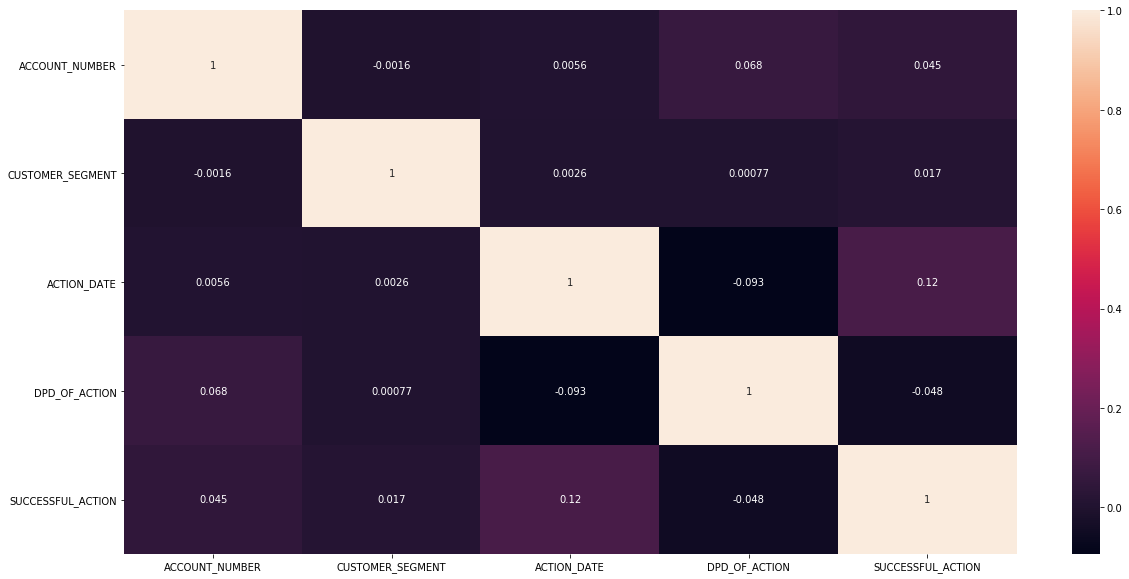

In [31]:
# Check the Correlation Matrix
plt.figure(figsize = (20,10))
sns.heatmap(action_analytics.corr(),annot = True)
plt.show()

##  Step 7 : Model Building and Feature Scaling using RFE

In [32]:
import statsmodels.api as sm


In [33]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      SUCCESSFUL_ACTION   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1393
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -950.82
Date:                Thu, 14 Nov 2019   Deviance:                       1901.6
Time:                        17:03:06   Pearson chi2:                 1.40e+03
No. Iterations:                     4                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6014      0.129     -4.673      0.000      -0.854      -0.349
ACCOUNT_NUMBER       0.1056      0.055      1.936      0.053      -0.001       0.212
CUSTOMER_SEGMENT     0.0100      0.054      0.184      0.854      -0.096       0.116
ACTION_DATE        3.46e-08   6.42e-09      5.387      0.000     2.2e-08    4.72e-08
ACTION_STRATEGY      0.0820      0.274      0.299      0.765      -0.455       0.619
DPD_OF_ACTION       -0.1156      0.274     -0.421      0.673      -0.653       0.422
COLLECTOR_CODE      -0.0664      0.054     -1.220      0.223      -0.173       0.040
====================================================================================
"""

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
from sklearn.feature_selection import RFE

In [36]:
rfe = RFE(logreg,6)


In [37]:
rfe = rfe.fit(X_train,y_train)

In [38]:
rfe.support_

array([ True,  True,  True,  True,  True,  True])

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('ACCOUNT_NUMBER', True, 1),
 ('CUSTOMER_SEGMENT', True, 1),
 ('ACTION_DATE', True, 1),
 ('ACTION_STRATEGY', True, 1),
 ('DPD_OF_ACTION', True, 1),
 ('COLLECTOR_CODE', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]

In [41]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

#### Assigning the model with StatsModel

In [42]:
X_train_sm = sm.add_constant(X_train[col])

In [43]:
logm2 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      SUCCESSFUL_ACTION   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1393
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -950.82
Date:                Thu, 14 Nov 2019   Deviance:                       1901.6
Time:                        17:03:07   Pearson chi2:                 1.40e+03
No. Iterations:                     4                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6014      0.129     -4.673      0.000      -0.854      -0.349
ACCOUNT_NUMBER       0.1056      0.055      1.936      0.053      -0.001       0.212
CUSTOMER_SEGMENT     0.0100      0.054      0.184      0.854      -0.096       0.116
ACTION_DATE        3.46e-08   6.42e-09      5.387      0.000     2.2e-08    4.72e-08
ACTION_STRATEGY      0.0820      0.274      0.299      0.765      -0.455       0.619
DPD_OF_ACTION       -0.1156      0.274     -0.421      0.673      -0.653       0.422
COLLECTOR_CODE      -0.0664      0.054     -1.220      0.223      -0.173       0.040
====================================================================================
"""

In [44]:
# Getting the preodicated values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

773     0.333205
1991    0.525048
1529    0.578749
746     0.510669
78      0.500464
301     0.522571
420     0.544106
1982    0.563566
891     0.537748
545     0.421455
dtype: float64

In [45]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33320454, 0.5250476 , 0.57874866, 0.51066881, 0.50046402,
       0.52257088, 0.54410575, 0.56356645, 0.53774795, 0.42145491])

#### Creating data frame with the actual success action and the predicated probabilities

In [46]:
y_train_pred_final = pd.DataFrame({'SUCCESSFUL_ACTION':y_train.values, 'SUCCESS_PROB':y_train_pred})
y_train_pred_final['DPD_OF_ACTION'] = y_train.index
y_train_pred_final.head()

,SUCCESSFUL_ACTION,SUCCESS_PROB,DPD_OF_ACTION
0,0,0.333205,773
1,0,0.525048,1991
2,1,0.578749,1529
3,1,0.510669,746
4,0,0.500464,78


#### Creating new column 'Predicateed with 1 if SUCCESS_PROB>0.5 else 0

In [47]:
y_train_pred_final['Prediced'] = y_train_pred_final.SUCCESS_PROB.map(lambda x:1 if x > 0.5 else 0)

In [48]:
# Let'see the output
y_train_pred_final.head()

,SUCCESSFUL_ACTION,SUCCESS_PROB,DPD_OF_ACTION,Prediced
0,0,0.333205,773,0
1,0,0.525048,1991,1
2,1,0.578749,1529,1
3,1,0.510669,746,1
4,0,0.500464,78,1


### Confusion Matrix

In [49]:
from sklearn import metrics

In [50]:
confusion = metrics.confusion_matrix(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.Prediced )
print(confusion)

[[344 347]
 [202 507]]


In [51]:
# Predicted     No_Successful_Action    SUCCESSFUL_ACTION
# Actual
# No_Successful_Action        344         347
# SUCCESSFUL_ACTION            202       507  

In [52]:
# Let's check the overll accurcy
print(metrics.accuracy_score(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.Prediced))

0.6078571428571429


### Checking Variance Inflation Factor (VIF)

In [53]:
# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,DPD_OF_ACTION,25.58
3,ACTION_STRATEGY,25.54
0,ACCOUNT_NUMBER,1.01
5,COLLECTOR_CODE,1.01
1,CUSTOMER_SEGMENT,1.00
2,ACTION_DATE,1.00


In [55]:
#col = col.drop('DPD_OF_ACTION',1)
#col

In [56]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      SUCCESSFUL_ACTION   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1393
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -950.82
Date:                Thu, 14 Nov 2019   Deviance:                       1901.6
Time:                        17:03:08   Pearson chi2:                 1.40e+03
No. Iterations:                     4                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6014      0.129     -4.673      0.000      -0.854      -0.349
ACCOUNT_NUMBER       0.1056      0.055      1.936      0.053      -0.001       0.212
CUSTOMER_SEGMENT     0.0100      0.054      0.184      0.854      -0.096       0.116
ACTION_DATE        3.46e-08   6.42e-09      5.387      0.000     2.2e-08    4.72e-08
ACTION_STRATEGY      0.0820      0.274      0.299      0.765      -0.455       0.619
DPD_OF_ACTION       -0.1156      0.274     -0.421      0.673      -0.653       0.422
COLLECTOR_CODE      -0.0664      0.054     -1.220      0.223      -0.173       0.040
====================================================================================
"""

In [57]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [58]:
y_train_pred[:10]

array([0.33320454, 0.5250476 , 0.57874866, 0.51066881, 0.50046402,
       0.52257088, 0.54410575, 0.56356645, 0.53774795, 0.42145491])

In [59]:
y_train_pred_final['SUCCESS_PROB'] = y_train_pred

In [60]:
# Creating new column'predicted' with 1 if success_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.SUCCESS_PROB.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,SUCCESSFUL_ACTION,SUCCESS_PROB,DPD_OF_ACTION,Prediced,predicted
0,0,0.333205,773,0,0
1,0,0.525048,1991,1,1
2,1,0.578749,1529,1,1
3,1,0.510669,746,1,1
4,0,0.500464,78,1,1


In [61]:
# Let' see the accuracy 

print (metrics.accuracy_score(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.predicted))

0.6078571428571429


#### This accuracy is same as we got in previous analysis

#### Let's check the VIFs again

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,DPD_OF_ACTION,25.58
3,ACTION_STRATEGY,25.54
0,ACCOUNT_NUMBER,1.01
5,COLLECTOR_CODE,1.01
1,CUSTOMER_SEGMENT,1.00
2,ACTION_DATE,1.00


##### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model

In [63]:
# Let's take a look at confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.predicted)
confusion

array([[344, 347],
       [202, 507]], dtype=int64)

In [64]:
# Predicted     No_Successful_Action    SUCCESSFUL_ACTION
# Actual
# No_Successful_Action        339         352
# SUCCESSFUL_ACTION            208       501 

In [65]:
# Let's check the overall accuracy 

metrics.accuracy_score(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.predicted)

0.6078571428571429

### Metrics beyond simply accuracy

In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7150916784203103

In [68]:
# Let us calculate specificity
TN / float(TN+FP)

0.49782923299565845

In [69]:
# Calculate false postive rate - predicting successful action 
print(FP/ float(TN+FP))

0.5021707670043415


In [70]:
# positive predictive value 
print (TP / float(TP+FP))

0.5936768149882904


In [71]:
# Negative predictive value
print (TN / float(TN+ FN))

0.63003663003663


## Step 8 : Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [72]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.SUCCESS_PROB, drop_intermediate = False )

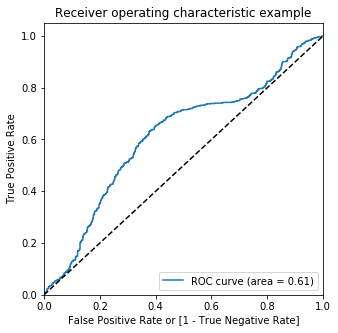

In [74]:
draw_roc(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.SUCCESS_PROB)

## Step 9 : Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [75]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.SUCCESS_PROB.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,SUCCESSFUL_ACTION,SUCCESS_PROB,DPD_OF_ACTION,Prediced,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.333205,773,0,0,1,1,1,1,0,0,0,0,0,0
1,0,0.525048,1991,1,1,1,1,1,1,1,1,0,0,0,0
2,1,0.578749,1529,1,1,1,1,1,1,1,1,0,0,0,0
3,1,0.510669,746,1,1,1,1,1,1,1,1,0,0,0,0
4,0,0.500464,78,1,1,1,1,1,1,1,1,0,0,0,0


In [76]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.506429  1.000000  0.000000
0.1   0.1  0.506429  1.000000  0.000000
0.2   0.2  0.506429  1.000000  0.000000
0.3   0.3  0.506429  1.000000  0.000000
0.4   0.4  0.517143  0.861777  0.163531
0.5   0.5  0.607857  0.715092  0.497829
0.6   0.6  0.507143  0.136812  0.887120
0.7   0.7  0.493571  0.000000  1.000000
0.8   0.8  0.493571  0.000000  1.000000
0.9   0.9  0.493571  0.000000  1.000000


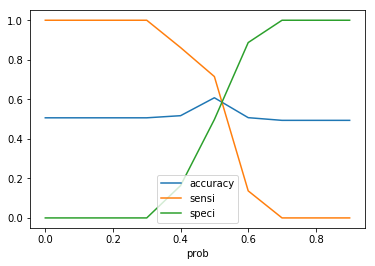

In [77]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [78]:
y_train_pred_final['final_predicted'] = y_train_pred_final.SUCCESS_PROB.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,SUCCESSFUL_ACTION,SUCCESS_PROB,DPD_OF_ACTION,Prediced,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.333205,773,0,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.525048,1991,1,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.578749,1529,1,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.510669,746,1,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.500464,78,1,1,1,1,1,1,1,1,0,0,0,0,1


In [79]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.final_predicted)

0.5064285714285715

In [80]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.final_predicted )
confusion2

array([[  0, 691],
       [  0, 709]], dtype=int64)

In [81]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

1.0

In [83]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

1.0


In [84]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5064285714285715


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

nan


### Precision and Recall

In [86]:
confusion = metrics.confusion_matrix(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.predicted )
confusion

array([[344, 347],
       [202, 507]], dtype=int64)

Precision - TP/TP+FP

In [87]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.5936768149882904

Recall - TP/TP+FN

In [88]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7150916784203103

Using SKLEARN utilities for the same

In [89]:
from sklearn.metrics import precision_score, recall_score

In [90]:
?precision_score

In [91]:
precision_score(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.predicted)

0.5936768149882904

In [92]:
recall_score(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.predicted)

0.7150916784203103

### Precision and Recall Tradeoff

In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       0
 5       1
 6       0
 7       1
 8       0
 9       0
 10      0
 11      1
 12      1
 13      1
 14      0
 15      0
 16      0
 17      1
 18      0
 19      1
 20      1
 21      0
 22      0
 23      1
 24      0
 25      0
 26      0
 27      0
 28      1
 29      1
        ..
 1370    1
 1371    1
 1372    1
 1373    0
 1374    0
 1375    1
 1376    0
 1377    1
 1378    1
 1379    0
 1380    1
 1381    1
 1382    1
 1383    1
 1384    1
 1385    1
 1386    1
 1387    1
 1388    0
 1389    1
 1390    1
 1391    1
 1392    1
 1393    0
 1394    1
 1395    1
 1396    1
 1397    1
 1398    0
 1399    0
 Name: SUCCESSFUL_ACTION, Length: 1400, dtype: int64, 0       0
 1       1
 2       1
 3       1
 4       1
 5       1
 6       1
 7       1
 8       1
 9       0
 10      1
 11      1
 12      1
 13      0
 14      0
 15      0
 16      0
 17      1
 18      1
 19      1
 20      1
 21      1
 22      1
 23      0
 24      1
 

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.SUCCESSFUL_ACTION, y_train_pred_final.SUCCESS_PROB)

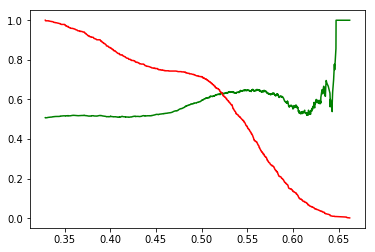

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()
     

## Step 10 : Making Predictions on the Test Set

In [97]:
X_test[['CUSTOMER_SEGMENT','ACTION_STRATEGY','DPD_OF_ACTION','ACCOUNT_NUMBER','COLLECTOR_CODE']] = scaler.fit_transform(X_test[['CUSTOMER_SEGMENT', 'ACTION_STRATEGY','DPD_OF_ACTION','ACCOUNT_NUMBER','COLLECTOR_CODE']])

In [98]:
X_test = X_test[col]
X_test.head()

,ACCOUNT_NUMBER,CUSTOMER_SEGMENT,ACTION_DATE,ACTION_STRATEGY,DPD_OF_ACTION,COLLECTOR_CODE
1025,1.322818,0.653195,24102001,-0.133067,-0.012617,-1.161998
1208,0.360886,-1.457669,16092001,0.819032,0.675594,0.209991
1055,-0.404164,0.653195,24102001,-0.133067,-0.012617,-1.161998
367,-0.826370,1.356816,27062000,-1.493208,-1.389040,-0.018674
815,-1.248797,-1.457669,12062001,-0.269081,-0.012617,2.496638


In [99]:
X_test_sm = sm.add_constant(X_test)

###  Making predictions on the test set

In [100]:
y_test_pred = res.predict(X_test_sm)

In [101]:
y_test_pred[:10]

1025    0.609795
1208    0.488502
1055    0.565645
367     0.574603
815     0.373567
372     0.627177
573     0.376822
1186    0.540534
1590    0.377950
1841    0.517173
dtype: float64

In [102]:
# Converting y_pred to a dataframe which us an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [103]:
# Let's see the head
y_pred_1.head()

,0
1025,0.609795
1208,0.488502
1055,0.565645
367,0.574603
815,0.373567


In [104]:
# Converting y_test to DataFrame
y_test_df = pd.DataFrame(y_test)

In [105]:
# Putting DPD Of Action to index
y_test_df['DPD_OF_ACTION'] = y_test_df.index

In [106]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
y_pred_final.head()

,SUCCESSFUL_ACTION,DPD_OF_ACTION,0
0,1,1025,0.609795
1,0,1208,0.488502
2,1,1055,0.565645
3,0,367,0.574603
4,1,815,0.373567


In [109]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Success_Prob'})

In [110]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['DPD_OF_ACTION','SUCCESSFUL_ACTION','Success_Prob'], axis=1)

In [111]:
# Let's see the head of y_pred_final
y_pred_final.head()

,DPD_OF_ACTION,SUCCESSFUL_ACTION,Success_Prob
0,1025,1,0.609795
1,1208,0,0.488502
2,1055,1,0.565645
3,367,0,0.574603
4,815,1,0.373567


In [112]:
y_pred_final['final_predicted'] = y_pred_final.Success_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [113]:
y_pred_final.head()

,DPD_OF_ACTION,SUCCESSFUL_ACTION,Success_Prob,final_predicted
0,1025,1,0.609795,1
1,1208,0,0.488502,1
2,1055,1,0.565645,1
3,367,0,0.574603,1
4,815,1,0.373567,0


In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.SUCCESSFUL_ACTION, y_pred_final.final_predicted)

0.47333333333333333

In [115]:
confusion2 = metrics.confusion_matrix(y_pred_final.SUCCESSFUL_ACTION, y_pred_final.final_predicted )
confusion2

array([[ 55, 254],
       [ 62, 229]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7869415807560137

In [118]:
# Let us calculate specificity
TN / float(TN+FP)

0.1779935275080906

# Random Forest Model

### Data Understanding and Cleaning

In [119]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [120]:
# Reading the data set

df = pd.read_csv("C:/Users/chandrasen.wadikar/Desktop/action_analytics.csv")
df.head()

,CUSTOMER_NUMBER,ACCOUNT_NUMBER,CUSTOMER_SEGMENT,ACTION_DATE,ACTION_STRATEGY,DPD_OF_ACTION,COLLECTOR_CODE,SUCCESSFUL_ACTION
0,CN48562492,2423104486,S1,04-03-2000,ACT1,1-10,C1,1
1,CN72623151,4605993654,S1,17-04-2000,ACT2,1-10,C2,1
2,CN27144358,8301851874,S1,28-06-2000,ACT3,1-10,C3,1
3,CN33795572,9453054029,S1,15-05-2000,ACT4,1-10,C4,0
4,CN28279711,2248165088,S1,09-02-2000,ACT5,1-10,C5,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
CUSTOMER_NUMBER      2000 non-null object
ACCOUNT_NUMBER       2000 non-null int64
CUSTOMER_SEGMENT     2000 non-null object
ACTION_DATE          2000 non-null object
ACTION_STRATEGY      2000 non-null object
DPD_OF_ACTION        2000 non-null object
COLLECTOR_CODE       2000 non-null object
SUCCESSFUL_ACTION    2000 non-null int64
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


In [122]:
for col in ['CUSTOMER_NUMBER', 'DPD_OF_ACTION']:
    df[col] = df[col].astype('object')

In [123]:
# Assigning the numeric value for each DPD Action record.
varlist = ['DPD_OF_ACTION']

# defining tthe map function
def binary_map(x):
    return x.map({'1-10':1,"11-20":2,"21-30":3,"31-40":4,"41-50":5})

# Applying the function to the list

df[varlist] = df[varlist].apply(binary_map)

In [124]:
# Replace common value of COLLECTOR_CODE with space.
df.COLLECTOR_CODE = df.COLLECTOR_CODE.str.replace("[C]", " ")

In [125]:
df.ACTION_STRATEGY = df.ACTION_STRATEGY.str.replace('ACT', '')

In [126]:
# Defining numeric value to different Customer Segment as defined
varlist1 = ['CUSTOMER_SEGMENT']

# defining tthe map function
def binary_map(x):
    return x.map({'S1':1,"S2":2,"S3":3,"S4":4,"S5":5})

# Applying the function to the list

df[varlist1] = df[varlist1].apply(binary_map)

In [127]:
# Converting date from object to numeric value
df['ACTION_DATE'] = pd.to_numeric(df.ACTION_DATE.str.replace('-',''))

### Data Preparation and Model Building

In [128]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [129]:
# Putting feature variable to X
X= df.drop(['CUSTOMER_NUMBER','SUCCESSFUL_ACTION'],axis=1)
X.head()

# Putting response variable to y
y = df['SUCCESSFUL_ACTION']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Default Hyperparameters

#### First fit a Random Forest model with default hyperparameters

In [130]:
# Importing random forest classifier from SKlearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters
rfc = RandomForestClassifier()

In [131]:
# Fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
# Making predictions
predictions = rfc.predict(X_test)

In [133]:
# Importing classigication report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [134]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       310
          1       0.97      0.96      0.96       290

avg / total       0.97      0.96      0.96       600



In [135]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[302   8]
 [ 13 277]]


In [136]:
print(accuracy_score(y_test,predictions))

0.965


### Hyperparameter Tuning

##### Tuning max_depth

In [137]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [138]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018752,6.255388e-03,0.000000,0.000000,2,{'max_depth': 2},0.803571,0.842857,0.839286,0.650000,...,0.791429,0.072090,4,0.819643,0.854464,0.829464,0.684821,0.813393,0.800357,0.059439
1,0.015625,6.641573e-07,0.003125,0.006250,7,{'max_depth': 7},0.978571,0.960714,0.982143,0.950000,...,0.971429,0.013740,3,0.987500,0.984821,0.987500,0.980357,0.983036,0.984643,0.002732
2,0.018747,6.243762e-03,0.000000,0.000000,12,{'max_depth': 12},0.992857,0.975000,0.982143,0.978571,...,0.982857,0.006145,1,0.993750,0.996429,0.995536,0.998214,0.996429,0.996071,0.001451
3,0.015626,8.476443e-07,0.003125,0.006249,17,{'max_depth': 17},0.989286,0.967857,0.985714,0.967857,...,0.979286,0.009422,2,0.999107,0.997321,0.999107,1.000000,0.998214,0.998750,0.000911


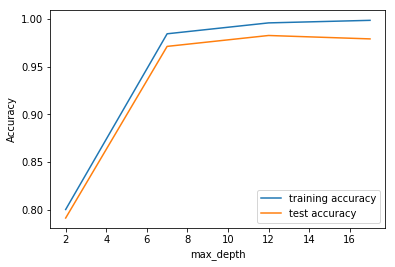

In [139]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning n_estimators

In [140]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [141]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.145038,0.009006,0.008055,0.007008,100,{'n_estimators': 100},0.892857,0.921429,0.896429,0.857143,...,0.898571,0.024391,4,0.897321,0.923214,0.873214,0.894643,0.924107,0.902500,0.019195
1,0.689509,0.033206,0.041601,0.005920,500,{'n_estimators': 500},0.921429,0.925000,0.896429,0.857143,...,0.905000,0.026206,2,0.919643,0.925893,0.877679,0.898214,0.933036,0.910893,0.020277
2,1.457380,0.088470,0.081912,0.007577,900,{'n_estimators': 900},0.910714,0.917857,0.900000,0.878571,...,0.905714,0.015419,1,0.909821,0.915179,0.884821,0.916964,0.930357,0.911429,0.014923
3,1.859430,0.104250,0.104680,0.011588,1300,{'n_estimators': 1300},0.907143,0.910714,0.896429,0.857143,...,0.899286,0.022968,3,0.913393,0.915179,0.883929,0.908036,0.928571,0.909821,0.014606


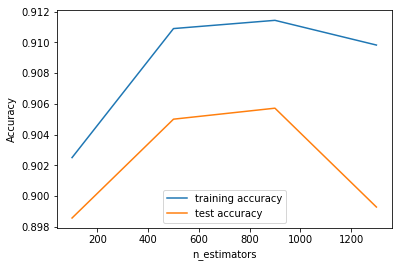

In [142]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning max_features

In [143]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2,4,6]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [2, 4, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [144]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019620,0.007934,0.001601,0.000800,2,{'max_features': 2},0.925000,0.875000,0.932143,0.867857,...,0.902143,0.026108,3,0.924107,0.880357,0.941964,0.895536,0.908929,0.910179,0.021492
1,0.027655,0.006271,0.001999,0.001266,4,{'max_features': 4},0.946429,0.932143,0.928571,0.928571,...,0.930714,0.009203,1,0.940179,0.927679,0.919643,0.942857,0.918750,0.929821,0.010079
2,0.030620,0.001745,0.002202,0.000400,6,{'max_features': 6},0.946429,0.910714,0.935714,0.928571,...,0.921429,0.021309,2,0.937500,0.920536,0.934821,0.942857,0.920536,0.931250,0.009123


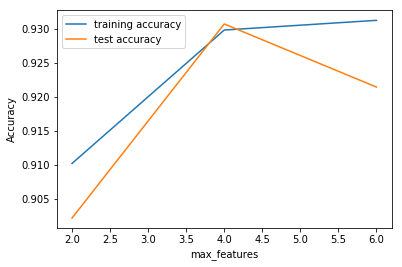

In [145]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Tuning min_samples_leaf

In [146]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [147]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018621,0.009343,0.004726,0.005450,100,{'min_samples_leaf': 100},0.764286,0.764286,0.814286,0.714286,...,0.761429,0.032135,1,0.799107,0.771429,0.779464,0.727679,0.754464,0.766429,0.024114
1,0.016728,0.002206,0.000400,0.000800,150,{'min_samples_leaf': 150},0.617857,0.707143,0.685714,0.617857,...,0.666429,0.040318,3,0.683929,0.710714,0.669643,0.634821,0.724107,0.684643,0.031448
2,0.016317,0.004522,0.001798,0.000980,200,{'min_samples_leaf': 200},0.632143,0.700000,0.739286,0.667857,...,0.681429,0.036027,2,0.679464,0.690179,0.685714,0.646429,0.670536,0.674464,0.015492
3,0.017816,0.002714,0.002005,0.000632,250,{'min_samples_leaf': 250},0.632143,0.632143,0.610714,0.664286,...,0.641429,0.021618,4,0.679464,0.623214,0.628571,0.671429,0.670536,0.654643,0.023740
4,0.015410,0.000483,0.001798,0.000407,300,{'min_samples_leaf': 300},0.610714,0.632143,0.610714,0.614286,...,0.616429,0.008018,5,0.633036,0.623214,0.628571,0.632143,0.660714,0.635536,0.013054


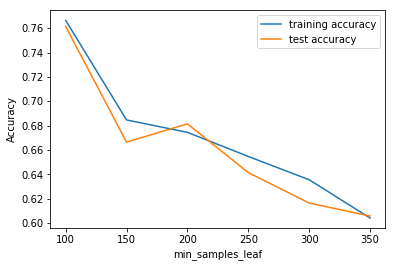

In [148]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_split

In [149]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [150]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019340,0.002822,0.001407,7.980217e-04,200,{'min_samples_split': 200},0.935714,0.910714,0.914286,0.900000,...,0.913571,0.012037,1,0.925000,0.920536,0.900893,0.922321,0.917857,0.917321,0.008538
1,0.015621,0.000009,0.003128,6.256580e-03,250,{'min_samples_split': 250},0.885714,0.875000,0.932143,0.853571,...,0.882143,0.027199,2,0.877679,0.892857,0.916071,0.875893,0.858036,0.884107,0.019426
2,0.016867,0.008919,0.001201,9.805036e-04,300,{'min_samples_split': 300},0.928571,0.782143,0.878571,0.760714,...,0.845714,0.063704,3,0.916071,0.776786,0.857143,0.801786,0.866964,0.843750,0.049384
3,0.016611,0.001852,0.002002,4.101908e-07,350,{'min_samples_split': 350},0.753571,0.803571,0.892857,0.732143,...,0.789286,0.056740,5,0.782143,0.816071,0.875893,0.783036,0.782143,0.807857,0.036428
4,0.024416,0.002334,0.002803,9.810299e-04,400,{'min_samples_split': 400},0.753571,0.821429,0.828571,0.753571,...,0.792857,0.032811,4,0.782143,0.827679,0.817857,0.782143,0.818750,0.805714,0.019550


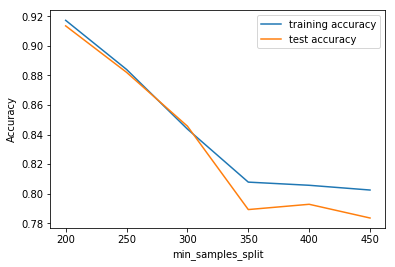

In [151]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to find Optimal Hyperparameters

In [152]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,4,6],
    'min_samples_leaf': range(50, 100, 150),
    'min_samples_split': range(100, 200, 300),
    'n_estimators': [100,200, 300], 
    'max_features': [2,4]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [153]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   15.4s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': range(50, 100, 150), 'min_samples_split': range(100, 200, 300), 'n_estimators': [100, 200, 300], 'max_features': [2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [154]:
# printing the optimal accuracy score and hyperparameteres
print('We can get accuracy of', grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9035714285714286 using {'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


** Fitting the final model with the best parameters obtained from grid search.**

In [155]:
# Model with best hyperparameters

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap = True,
                            max_depth=5,
                            min_samples_leaf=50,
                            min_samples_split=10,
                            max_features=6,
                            n_estimators=100)

In [156]:
# Check Fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [157]:
# predict
predictions = rfc.predict(X_test)

In [158]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [159]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.94      0.93       310
          1       0.93      0.92      0.93       290

avg / total       0.93      0.93      0.93       600



In [160]:
print(confusion_matrix(y_test,predictions))

[[290  20]
 [ 23 267]]


In [161]:
print(accuracy_score(y_test,predictions))

0.9283333333333333
